In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import json

In [4]:
pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [10]:
import pandas as pd
import json
from pathlib import Path

def load_and_explore():
    """Charger et explorer les données du fichier service_tickets.csv"""
    
    print("=" * 60)
    print("EXPLORATION DU DATASET IT SERVICE TICKETS")
    print("=" * 60)
    
    # Path relatif depuis le dossier notebooks
    csv_path = Path("../data/raw/service_tickets.csv")
    if not csv_path.exists():
        print(f"❌ Fichier introuvable : {csv_path}. Vérifiez le chemin ou upload.")
        return
    
    # Charger le CSV
    df = pd.read_csv(csv_path)
    
    # Informations générales
    print(f"\n INFORMATIONS GÉNÉRALES")
    print(f"Fichier : {csv_path.name}")
    print(f"Shape : {df.shape}")
    print(f"Colonnes : {list(df.columns)}")
    
    # Aperçu des données
    print(f"\n APERÇU DES DONNÉES")
    print(df.head())
    
    # Types de données
    print(f"\n TYPES DE DONNÉES")
    print(df.dtypes)
    
    # Valeurs manquantes
    print(f"\n❓ VALEURS MANQUANTES")
    missing = df.isnull().sum()
    print(missing[missing > 0])
    
    # Distribution des catégories
    if "Topic_group" in df.columns:
        print(f"\n  DISTRIBUTION DES CATÉGORIES")
        print(df['Topic_group'].value_counts())
    
    # Statistiques du texte
    if "Document" in df.columns:
        df['text_length'] = df['Document'].astype(str).str.len()
        df['word_count'] = df['Document'].astype(str).str.split().str.len()
        
        print(f"\n STATISTIQUES DU TEXTE")
        print("Longueur caractères:\n", df['text_length'].describe())
        print("Nombre de mots:\n", df['word_count'].describe())
        
        # Exemples par catégorie
        if "Topic_group" in df.columns:
            print(f"\n EXEMPLES PAR CATÉGORIE")
            for category in df['Topic_group'].unique()[:3]:  # Premières 3 catégories
                print(f"\n--- {category} ---")
                examples = df[df['Topic_group'] == category]['Document'].head(2)
                for i, example in enumerate(examples, 1):
                    print(f"{i}. {example[:100]}...")
    
    # Charger les métriques de préparation si disponibles
    metrics_file = Path("../metrics/data_preparation.json")
    if metrics_file.exists():
        with open(metrics_file, 'r') as f:
            prep_metrics = json.load(f)
        
        print(f"\n MÉTRIQUES DE PRÉPARATION")
        print(f"Échantillons originaux : {prep_metrics.get('total_samples', 'N/A')}")
        print(f"Échantillons finaux : {prep_metrics.get('final_samples', 'N/A')}")
        print(f"Train : {prep_metrics.get('train_samples', 'N/A')}")
        print(f"Test : {prep_metrics.get('test_samples', 'N/A')}")
    
    return df


In [16]:
def plot_distributions(df):
    """Créer des visualisations"""
    
    print(f"\n CRÉATION DES VISUALISATIONS...")
    
    # Configuration subplots
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle('Exploration Dataset IT Service Tickets', fontsize=16)
    
    # Distribution des catégories
    category_counts = df['Topic_group'].value_counts()
    axes[0,0].bar(range(len(category_counts)), category_counts.values)
    axes[0,0].set_title('Distribution des Catégories')
    axes[0,0].set_xlabel('Catégories')
    axes[0,0].set_ylabel('Nombre de tickets')
    axes[0,0].tick_params(axis='x', rotation=45)
    
    # Distribution longueur texte
    df['text_length'] = df['Document'].str.len()
    axes[0,1].hist(df['text_length'], bins=50, alpha=0.7)
    axes[0,1].set_title('Distribution Longueur Texte')
    axes[0,1].set_xlabel('Nombre de caractères')
    axes[0,1].set_ylabel('Fréquence')
 # Distribution nombre de mots
    df['word_count'] = df['Document'].str.split().str.len()
    axes[1,0].hist(df['word_count'], bins=50, alpha=0.7, color='orange')
    axes[1,0].set_title('Distribution Nombre de Mots')
    axes[1,0].set_xlabel('Nombre de mots')
    axes[1,0].set_ylabel('Fréquence')
    # Longueur moyenne par catégorie
    avg_length_by_category = df.groupby('Topic_group')['text_length'].mean().sort_values()
    axes[1,1].barh(range(len(avg_length_by_category)), avg_length_by_category.values)
    axes[1,1].set_title('Longueur Moyenne par Catégorie')
    axes[1,1].set_xlabel('Longueur moyenne (caractères)')
    axes[1,1].set_yticks(range(len(avg_length_by_category)))
    axes[1,1].set_yticklabels(avg_length_by_category.index, fontsize=8)
    plt.tight_layout()


EXPLORATION DU DATASET IT SERVICE TICKETS

 INFORMATIONS GÉNÉRALES
Fichier : service_tickets.csv
Shape : (47837, 2)
Colonnes : ['Document', 'Topic_group']

 APERÇU DES DONNÉES
                                            Document    Topic_group
0  connection with icon icon dear please setup ic...       Hardware
1  work experience user work experience user hi w...         Access
2  requesting for meeting requesting meeting hi p...       Hardware
3  reset passwords for external accounts re expir...         Access
4  mail verification warning hi has got attached ...  Miscellaneous

 TYPES DE DONNÉES
Document       object
Topic_group    object
dtype: object

❓ VALEURS MANQUANTES
Series([], dtype: int64)

  DISTRIBUTION DES CATÉGORIES
Topic_group
Hardware                 13617
HR Support               10915
Access                    7125
Miscellaneous             7060
Storage                   2777
Purchase                  2464
Internal Project          2119
Administrative rights     1760
N

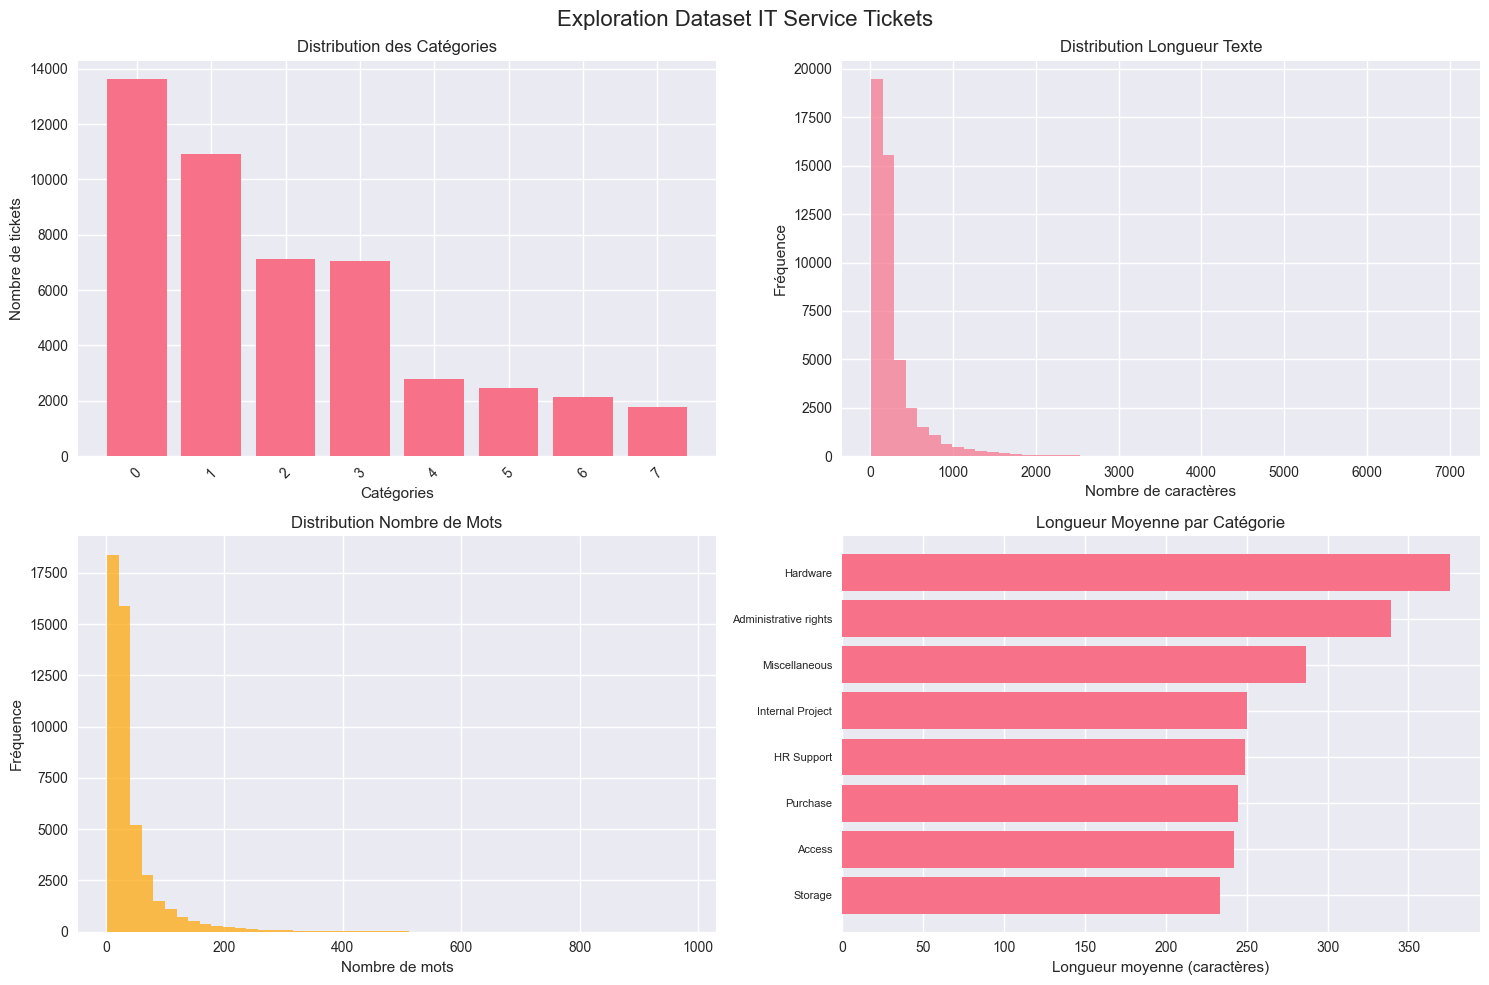

In [17]:
if __name__ == "__main__":
 # Explorer les données
    df = load_and_explore()
    if df is not None:
    # Créer les visualisations
        plot_distributions(df)
        print(f"\n✅ EXPLORATION TERMINÉE")
        print(f" Voir le graphique dans notebooks/plots/")